In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

M              74.1%
BCFG            7.0%
FG              3.6%
-RA             2.1%
BR              1.5%
RA              1.2%
-RA BCFG        1.0%
RA BCFG         0.7%
BCFG -RA        0.7%
-RA BR          0.6%
RA FG           0.6%
-RA FG          0.6%
RA BR           0.5%
BCFG RA         0.5%
SHRA            0.4%
-DZ             0.3%
VCFG            0.3%
FG DZ           0.3%
FG -RA          0.3%
BCFG -DZ        0.2%
DZ              0.2%
FG RA           0.2%
-DZ FG          0.2%
FG -DZ          0.2%
DZ BCFG         0.2%
+RA FG          0.2%
DZ FG           0.2%
BCFG DZ         0.1%
DZ BR           0.1%
-DZ BCFG        0.1%
-RADZ BCFG      0.1%
-DZ BR          0.1%
+RA BCFG        0.1%
-RADZ           0.1%
+DZ FG          0.1%
-SHRA           0.1%
-RADZ BR        0.1%
+SHRA           0.1%
+RA BR          0.1%
BR RA           0.1%
+RA             0.1%
TS              0.1%
BR -DZ          0.1%
-RADZ FG        0.1%
FG -RADZ        0.1%
BR -RA          0.0%
SHRA BCFG       0.0%
+DZ BR       

In [5]:
#label br/fg

station["brfg_l"] = "No BR/FG"
mask = station['wxcodes_o'].str.contains("BR")
station.loc[mask,["brfg_l"]] = "BR/FG"
mask = station['wxcodes_o'].str.contains("FG")
station.loc[mask,["brfg_l"]] = "BR/FG"
pd.options.display.max_rows = 999

print(station.sample(100))
print("*****************************")
station["brfg_l"].value_counts(normalize=True)

                      wxcodes_o    brfg_l
time                                     
2020-07-06 04:30:00           M  No BR/FG
2020-05-05 13:30:00           M  No BR/FG
2019-09-25 05:00:00    BCFG -RA     BR/FG
2020-12-06 08:50:00       RA FG     BR/FG
2019-01-09 16:00:00           M  No BR/FG
2019-06-23 17:30:00           M  No BR/FG
2019-09-29 19:30:00       RA FG     BR/FG
2020-06-09 01:00:00           M  No BR/FG
2019-05-07 20:30:00           M  No BR/FG
2020-12-19 23:41:00    -DZ BCFG     BR/FG
2020-01-23 09:00:00           M  No BR/FG
2019-10-19 20:30:00           M  No BR/FG
2019-03-17 22:00:00           M  No BR/FG
2019-12-01 04:00:00   SHRA BCFG     BR/FG
2020-09-28 15:00:00           M  No BR/FG
2019-06-15 07:30:00        BCFG     BR/FG
2018-11-10 20:00:00           M  No BR/FG
2019-04-24 19:00:00           M  No BR/FG
2020-07-16 00:30:00           M  No BR/FG
2019-03-05 12:00:00           M  No BR/FG
2019-03-09 09:30:00        BCFG     BR/FG
2020-08-05 17:30:00           M  N

No BR/FG    0.789954
BR/FG       0.210046
Name: brfg_l, dtype: float64

**Forecast D1**

In [6]:
#ria forecast d1
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD1.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,0,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,...,0.000000,0.000000e+00,0.142531,0.000000,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 01:00:00,1,333.670044,0.0,1731.173340,1.369249,2.540694,103382.539062,280.565735,0.778615,24135.000000,...,0.000000,0.000000e+00,0.112280,0.000000,0.0,0.112280,5732.622559,1611.490601,253.512878,281.793762
2019-01-02 02:00:00,2,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,...,0.000000,-8.593750e-07,0.061034,0.000000,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,3,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,...,0.000000,0.000000e+00,0.065096,0.000000,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,4,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,...,0.000000,-2.343750e-09,0.085678,0.000000,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 19:00:00,17491,297.835388,0.0,766.453003,6.263795,12.470805,101635.929688,279.777435,0.867834,24042.130859,...,99.540001,-7.467773e+00,0.000000,0.000000,0.0,0.000000,5371.030273,1446.678223,240.972382,271.724701
2021-01-01 20:00:00,17492,305.522644,0.0,769.984497,5.884632,12.509005,101664.109375,279.636444,0.861618,24046.214844,...,37.480000,-6.560820e+00,0.000000,0.077832,0.0,0.077832,5373.912109,1448.029297,241.139252,271.784821
2021-01-01 21:00:00,17493,304.144806,0.0,787.868713,6.053614,12.777985,101677.812500,279.624115,0.851240,24053.814453,...,25.900000,-1.712590e+01,0.000000,0.097343,0.0,0.097343,5376.250977,1449.369507,241.217819,271.922638


In [7]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k.sample(100)

,brfg_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2020-08-20 23:00:00,No BR/FG,151.435699,0.0,2487.825195,1.180486,2.356061,101220.304688,286.575317,1.000000,24037.789062,...,15.350000,-2.014254e+00,0.000000,0.361318,0.000000,0.361318,5660.815918,1469.735840,263.352051,283.162506
2019-12-16 20:00:00,No BR/FG,333.669769,0.0,928.066956,3.434126,7.256893,99718.781250,280.953674,0.897497,24055.060547,...,31.049999,-6.898063e+00,0.200000,0.000000,0.000000,0.200000,5281.452148,1322.210449,246.865814,273.597321
2020-12-20 12:00:00,No BR/FG,167.557129,0.0,1662.686646,4.329169,7.162290,102360.687500,283.558411,0.992519,24035.533203,...,20.100000,-1.785945e+00,0.100000,0.564000,0.000000,0.564000,5636.697754,1515.818848,257.840424,276.285126
2020-08-15 07:00:00,BR/FG,157.713135,0.0,2134.165527,2.192771,2.706254,101662.664062,287.281097,0.982696,241.343170,...,4.720000,-6.877125e+00,0.000000,0.564876,0.000000,0.564876,5632.597168,1492.294434,258.955811,280.859680
2020-05-24 22:00:00,No BR/FG,25.397947,0.0,2886.721680,2.337343,4.730778,102546.664062,289.834564,0.864298,24135.000000,...,0.000000,5.625000e-06,0.046180,0.000000,0.003225,0.046180,5807.172852,1585.269409,261.556549,286.382812
2019-12-02 13:00:00,No BR/FG,34.239380,0.0,1740.259277,8.555075,11.449533,101900.734375,285.395691,0.672486,24135.000000,...,0.000000,-2.851562e-04,0.000000,0.000000,0.000000,0.000000,5577.936035,1494.773804,256.966736,277.023132
2020-02-02 07:00:00,No BR/FG,172.061325,0.0,2384.795166,9.955901,15.199066,102474.257812,285.099213,0.909688,24037.789062,...,0.000000,-9.375000e-06,0.074159,0.000000,0.000000,0.074159,5722.240234,1546.485596,259.743866,283.841553
2019-05-10 03:00:00,BR/FG,222.840546,0.0,1810.676758,5.092504,10.139627,101157.757812,287.021393,0.981479,23825.208984,...,27.052999,-2.031250e-04,0.130000,0.740000,0.000000,0.740000,5595.313965,1460.912842,258.314758,280.323547
2020-12-12 22:00:00,No BR/FG,214.522049,0.0,2183.407715,2.278483,6.716723,101551.429688,285.681793,1.000000,229.967880,...,4.205000,-4.453719e+00,0.000000,0.768079,0.000000,0.768079,5639.412598,1485.042969,260.276489,281.050201


In [8]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:20<00:00,  2.79s/it]


In [9]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.87,0.79,None,0.87,12.98
LabelPropagation,0.87,0.79,None,0.87,12.47
ExtraTreesClassifier,0.89,0.75,None,0.88,1.98
BaggingClassifier,0.85,0.73,None,0.85,5.91
LGBMClassifier,0.88,0.73,None,0.86,1.23
RandomForestClassifier,0.88,0.73,None,0.87,8.04
KNeighborsClassifier,0.85,0.72,None,0.85,1.22
BernoulliNB,0.74,0.72,None,0.76,0.19
ExtraTreeClassifier,0.82,0.72,None,0.82,0.13


**ML LGBMClassifier**


Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       456       189   645
No BR/FG    244      2543  2787
All         700      2732  3432
Heidke Skill Score: 0.6

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.65    0.71      0.68   645.00
No BR/FG           0.93    0.91      0.92  2787.00
accuracy           0.87    0.87      0.87     0.87
macro avg          0.79    0.81      0.80  3432.00
weighted avg       0.88    0.87      0.88  3432.00

Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       432       195   627
No BR/FG    245      2560  2805
All         677      2755  3432
Heidke Skill Score: 0.58

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.64    0.69      0.66   627.00
No BR/FG           0.93    0.91    

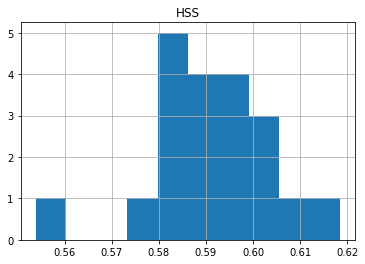

In [10]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();

**Add time features**

In [11]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [12]:

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [01:27<00:00,  3.03s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.88,0.81,None,0.88,8.34
LabelSpreading,0.88,0.81,None,0.88,12.11
ExtraTreesClassifier,0.90,0.78,None,0.90,2.99
LGBMClassifier,0.90,0.78,None,0.89,2.00
BaggingClassifier,0.87,0.77,None,0.87,6.08
KNeighborsClassifier,0.87,0.76,None,0.87,1.95
RandomForestClassifier,0.89,0.76,None,0.88,7.71
DecisionTreeClassifier,0.83,0.73,None,0.83,1.42
NearestCentroid,0.75,0.73,None,0.77,0.17



Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       476       165   641
No BR/FG    224      2567  2791
All         700      2732  3432
Heidke Skill Score: 0.64

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.68    0.74      0.71   641.00
No BR/FG           0.94    0.92      0.93  2791.00
accuracy           0.89    0.89      0.89     0.89
macro avg          0.81    0.83      0.82  3432.00
weighted avg       0.89    0.89      0.89  3432.00

Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       455       179   634
No BR/FG    216      2582  2798
All         671      2761  3432
Heidke Skill Score: 0.63

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.68    0.72      0.70   634.00
No BR/FG           0.94    0.92   

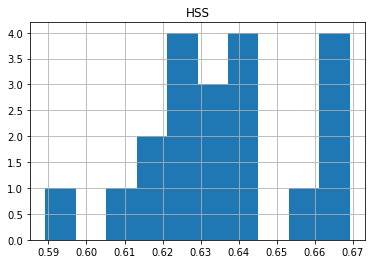

In [13]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop ranadom
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();


In [14]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("brfg_LEVX_1km_time_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [15]:
import sklearn
print(sklearn.__version__)

0.24.1


In [16]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = df_all1k.drop(columns=["brfg_l"]).columns.to_list() 

# X and Y
Y = df_all1k.brfg_l
X = df_all1k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       365       121   486
No BR/FG    138      1950  2088
All         503      2071  2574
Heidke Skill Score: 0.68

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.73    0.75      0.74   486.00
No BR/FG           0.94    0.93      0.94  2088.00
accuracy           0.90    0.90      0.90     0.90
macro avg          0.83    0.84      0.84  2574.00
weighted avg       0.90    0.90      0.90  2574.00

Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       351       135   486
No BR/FG    113      1975  2088
All         464      2110  2574
Heidke Skill Score: 0.68

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.76    0.72      0.74   486.00
No BR/FG           0.94    0.95   

,HSS
count,10.00
mean,0.68
std,0.01
min,0.65
25%,0.67
50%,0.67
75%,0.69
max,0.69
